# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [223]:
# Dependencies
import gmaps
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import requests
from citipy import citipy
import time
from datetime import datetime

from config import gkey
gmaps.configure(api_key=gkey)
from config import weather_api_key


## Generate Cities List

In [217]:
# List for holding lat_lngs and cities
coordinates = []
city_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lats, lngs)

# Identify nearest city for each set of coordinates
for coordinates in coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    if city not in city_list:
        city_list.append(city)



# Print the city count to confirm >500
print(len(city_list))


629


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [218]:
#weather url
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

In [219]:
#define variables
cities = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind = []
date = []
countries = []

In [220]:
record = 1
lineset = 1

#Start for loop with prints
print('-------------------------------------------------')
print('Finding Data')
print('-------------------------------------------------')

for city in city_list: 
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        countries.append(response['sys']['country'])
        clouds.append(response['clouds']['all'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])

        if record > 50:
            lineset += 1
            record = 1
            cities.append(city)
            time.sleep(2)
        else:
            record += 1
            cities.append(city)
        print(f'Record {record} of Set {lineset}; {city}')
    except (KeyError, IndexError):
        print('--------------ERROR--------------')
        print('No such city, SKIPPING')
        print('---------------------------------')
print('-------------------------------------------------')
print('Complete')
print('-------------------------------------------------')       


26 of Set 2; rio hato
Record 27 of Set 2; buala
Record 28 of Set 2; new norfolk
Record 29 of Set 2; grand river south east
Record 30 of Set 2; luderitz
Record 31 of Set 2; khatanga
Record 32 of Set 2; tasiilaq
Record 33 of Set 2; soma
Record 34 of Set 2; lazaro cardenas
Record 35 of Set 2; thompson
Record 36 of Set 2; aksarka
Record 37 of Set 2; samarai
Record 38 of Set 2; bathsheba
Record 39 of Set 2; talnakh
Record 40 of Set 2; fairbanks
Record 41 of Set 2; roald
Record 42 of Set 2; atuona
Record 43 of Set 2; myitkyina
Record 44 of Set 2; ahipara
Record 45 of Set 2; port alfred
Record 46 of Set 2; labuhan
Record 47 of Set 2; shache
Record 48 of Set 2; puerto ayora
Record 49 of Set 2; ancud
Record 50 of Set 2; kenai
Record 51 of Set 2; hida
Record 1 of Set 3; mar del plata
Record 2 of Set 3; atar
--------------ERROR--------------
No such city, SKIPPING
---------------------------------
Record 3 of Set 3; pisco
Record 4 of Set 3; cidreira
Record 5 of Set 3; moron
Record 6 of Set 3; vac

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [232]:
#Create dictionary to store data

weather_df = pd.DataFrame({
'City': cities,
'Country': countries,
'Lat': lat,
'Long': lng,
'Max Temp': max_temp,
'Humidity': humidity,
'Cloudiness': clouds,
'Wind Speed': wind,
'Date': date
})


weather_df.head()


,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,shimoda,JP,34.67,138.95,73.00,96,89,9.26,1599419377
1,georgetown,MY,5.41,100.34,80.60,83,20,1.01,1599419120
2,albany,US,42.60,-73.97,78.01,40,18,1.16,1599419378
3,sao filipe,IN,20.51,76.21,77.41,80,4,1.97,1599419378
4,jamestown,US,42.10,-79.24,73.00,52,1,2.13,1599419079


In [235]:
#output data
weather_df.to_csv("../output_data/weather_df.csv")

In [236]:
weather_df.count()

City          561
Country       561
Lat           561
Long          561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Date          561
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [237]:
humidity_sort = weather_df.sort_values(['Humidity'], ascending = False)
humidity_sort.head()


,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
296,grindavik,IS,63.84,-22.43,50.0,100,90,26.40,1599419450
232,vestmanna,FO,62.16,-7.17,48.2,100,100,17.22,1599419435
447,chimoio,MZ,-19.12,33.48,60.8,100,20,13.87,1599419486
24,petropavlovsk-kamchatskiy,RU,53.05,158.65,51.8,100,90,4.47,1599419382
213,yelizovo,RU,53.19,158.38,51.8,100,90,4.47,1599419431


In [238]:
less_humid_df = weather_df[weather_df.Humidity != 100]
less_humid_df = less_humid_df.sort_values(['Humidity'], ascending = False)
less_humid_df.head()

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
138,gimli,CA,50.63,-96.99,64.99,99,99,10.00,1599419410
106,vacaria,BR,-28.51,-50.93,57.99,99,86,9.95,1599419404
104,cidreira,BR,-30.18,-50.21,60.67,98,100,7.76,1599419404
451,nemuro,JP,43.32,145.57,66.81,98,99,9.44,1599419487
308,litoral del san juan,BR,-30.01,-50.16,61.65,97,100,5.03,1599419454


In [130]:
#  Get the indices of cities that have humidity over 100%.
most_humid_df = weather_df[weather_df.Humidity == 100]
most_humid_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
12,kenitra,34.26,-6.58,69.80,100,0,5.82,1599259998
80,kathu,7.92,98.33,84.99,100,20,1.12,1599259849
109,novo aripuana,22.78,-82.23,77.00,100,75,6.93,1599260053
179,esperance,-33.87,121.90,50.00,100,0,14.99,1599259808
241,lempaala,61.32,23.75,57.20,100,90,6.93,1599260086
244,carnarvon,-24.87,113.63,64.40,100,0,14.99,1599259958
245,klaksvik,62.23,-6.59,46.40,100,100,14.99,1599259977
248,znin,52.85,17.72,59.00,100,75,1.12,1599260087
265,poniatowa,51.18,22.13,64.99,100,90,4.70,1599260092
298,gat,31.61,34.76,84.00,100,0,3.06,1599260074


In [239]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data = weather_df.copy(deep=True)

In [240]:
y = clean_city_data['Humidity']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
print(removed_outliers.value_counts())

True     507
False     54
Name: Humidity, dtype: int64


In [241]:
indexes = clean_city_data[~removed_outliers].index
clean_city_data.drop(indexes, inplace=True)
clean_city_data.head()

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,shimoda,JP,34.67,138.95,73.00,96,89,9.26,1599419377
1,georgetown,MY,5.41,100.34,80.60,83,20,1.01,1599419120
2,albany,US,42.60,-73.97,78.01,40,18,1.16,1599419378
3,sao filipe,IN,20.51,76.21,77.41,80,4,1.97,1599419378
4,jamestown,US,42.10,-79.24,73.00,52,1,2.13,1599419079


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [242]:
ts = time.gmtime(weather_df['Date'][0])
datestr = time.strftime("%x",ts)
print(datestr)

09/06/20


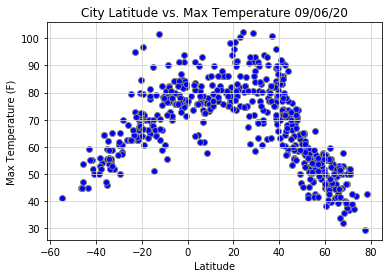

In [248]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], edgecolors="gray", facecolors="blue")
plt.title(f"City Latitude vs. Max Temperature {datestr}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/lat_v_maxtemp.png")
plt.show()

This plot shows that the maximum average temperature is acheived at a latitude of about ~20-40, but higher than 40 degrees latitude shows a rapid drop in maximum temperature.

## Latitude vs. Humidity Plot

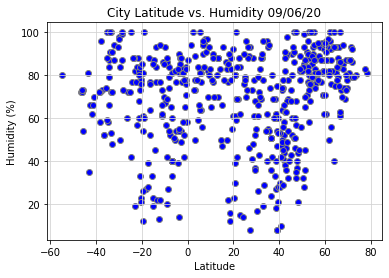

In [249]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], edgecolors="gray", facecolors="blue")
plt.title(f"City Latitude vs. Humidity {datestr}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/lat_v_humidity.png")
plt.show()

In analyzing the Latitude vs Humidity, there appears to be no correlation.

## Latitude vs. Cloudiness Plot

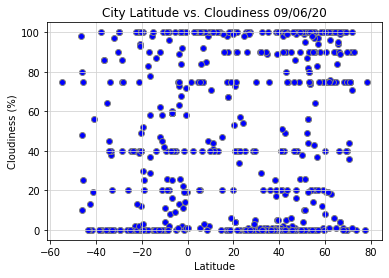

In [250]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], edgecolors="gray", facecolors="blue")
plt.title(f"City Latitude vs. Cloudiness {datestr}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/lat_v_cloudiness.png")
plt.show()

There is no correlation betweem latitude and cloudiness.

## Latitude vs. Wind Speed Plot

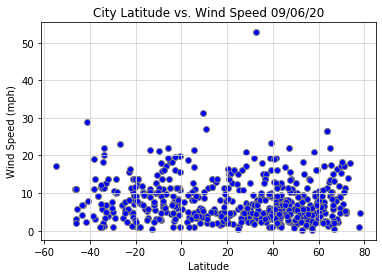

In [251]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], edgecolors="gray", facecolors="blue")
plt.title(f"City Latitude vs. Wind Speed {datestr}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/lat_v_wind.png")
plt.show()

There appears to be no correlation between latitude and wind speed.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [260]:
northern_df = weather_df[weather_df.Lat >= 0]
southern_df = weather_df[weather_df.Lat < 0]

The r-squared is: 0.5988500460616094


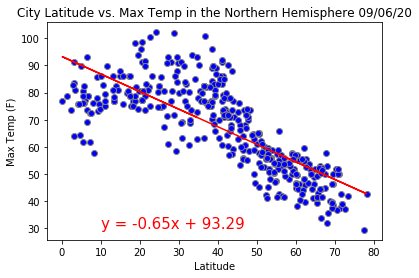

In [262]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
plt.title(f"City Latitude vs. Max Temp in the Northern Hemisphere {datestr}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="gray", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.savefig("../output_data/lat_v_temp_northern.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6520004872770694


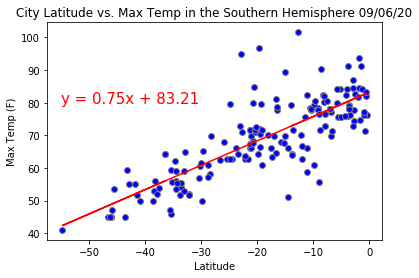

In [263]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
plt.title(f"City Latitude vs. Max Temp in the Southern Hemisphere {datestr}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="gray", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.savefig("../output_data/lat_v_temp_southern.png")
plt.show()

When plotting the Max Temp vs latitude, it can be observed that as the latitude appraoches 0 (equator), the maximum temperature increases. Thus, the average max temperature is hottest around the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02380812380805057


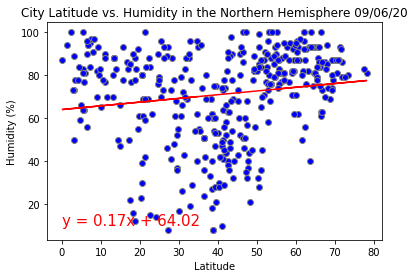

In [264]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
plt.title(f"City Latitude vs. Humidity in the Northern Hemisphere {datestr}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="gray", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.savefig("../output_data/lat_v_hum_northern.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0385434681903679


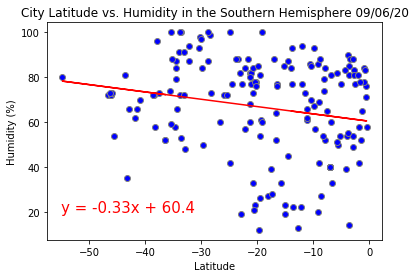

In [265]:

x_values = southern_df['Lat']
y_values = southern_df['Humidity']
plt.title(f"City Latitude vs. Humidity in the Southern Hemisphere {datestr}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="gray", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.savefig("../output_data/lat_v_hum_southern.png")
plt.show()

As seen in the previous plot, there is no correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003686263479056357


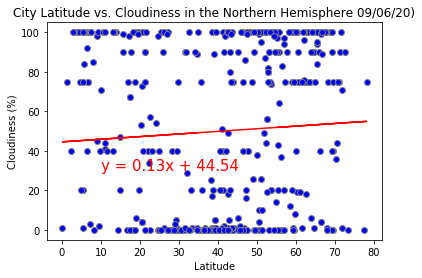

In [266]:

x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
plt.title(f"City Latitude vs. Cloudiness in the Northern Hemisphere {datestr})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="gray", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.savefig("../output_data/lat_v_cloud_northern.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01685483738025719


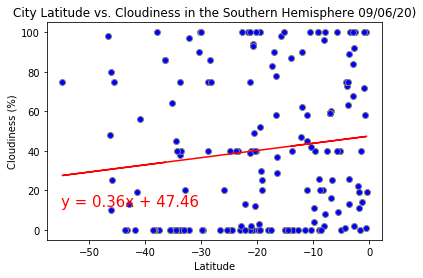

In [267]:

x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
plt.title(f"City Latitude vs. Cloudiness in the Southern Hemisphere {datestr})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="gray", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.annotate(line_eq,(-55,12),fontsize=15,color="red")
plt.savefig("../output_data/lat_v_cloud_southern.png")
plt.show()

As seen in the previous plot, there is no correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00021349952146455952


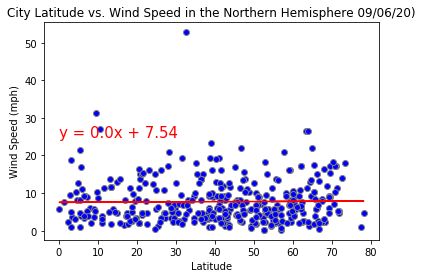

In [268]:

x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
plt.title(f"City Latitude vs. Wind Speed in the Northern Hemisphere {datestr})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="gray", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.savefig("../output_data/lat_v_wind_northern.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0009293372201288724


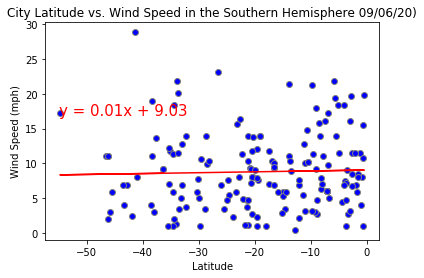

In [270]:

x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
plt.title(f"City Latitude vs. Wind Speed in the Southern Hemisphere {datestr})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="gray", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.annotate(line_eq,(-55,17),fontsize=15,color="red")
plt.savefig("../output_data/lat_v_wind_southern.png")
plt.show()

As seen in the previous plot, there is no correlation bewteen wind speed and latitude.